In [1]:
import base64
import numpy as np
from PIL import Image, ImageOps

In [2]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

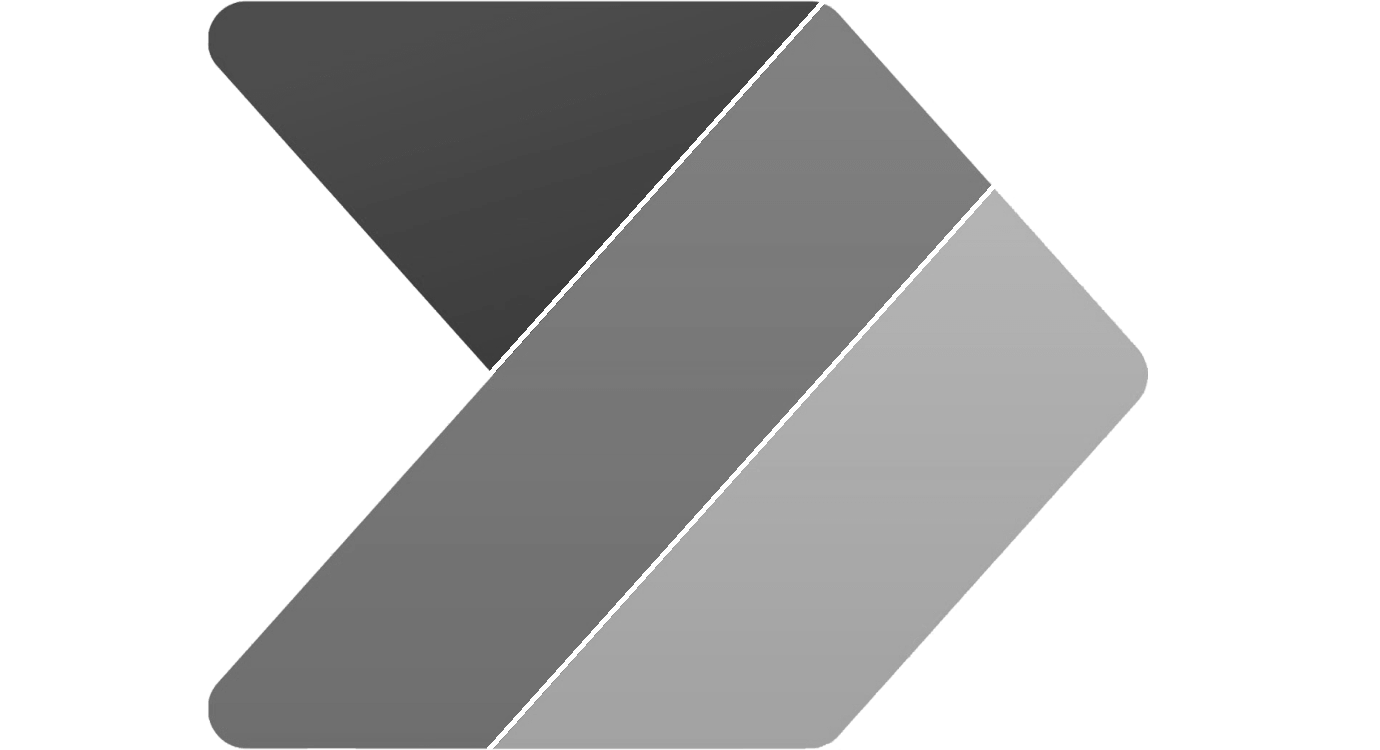

In [3]:
# Open the image
img = Image.open('logo-power-automate-integration_1380px_apps-integrationen.png')

# Convert all white to transparency
# Get RGBA data
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)

# Convert image to grayscale (If necessary)
img = ImageOps.grayscale(img)
img

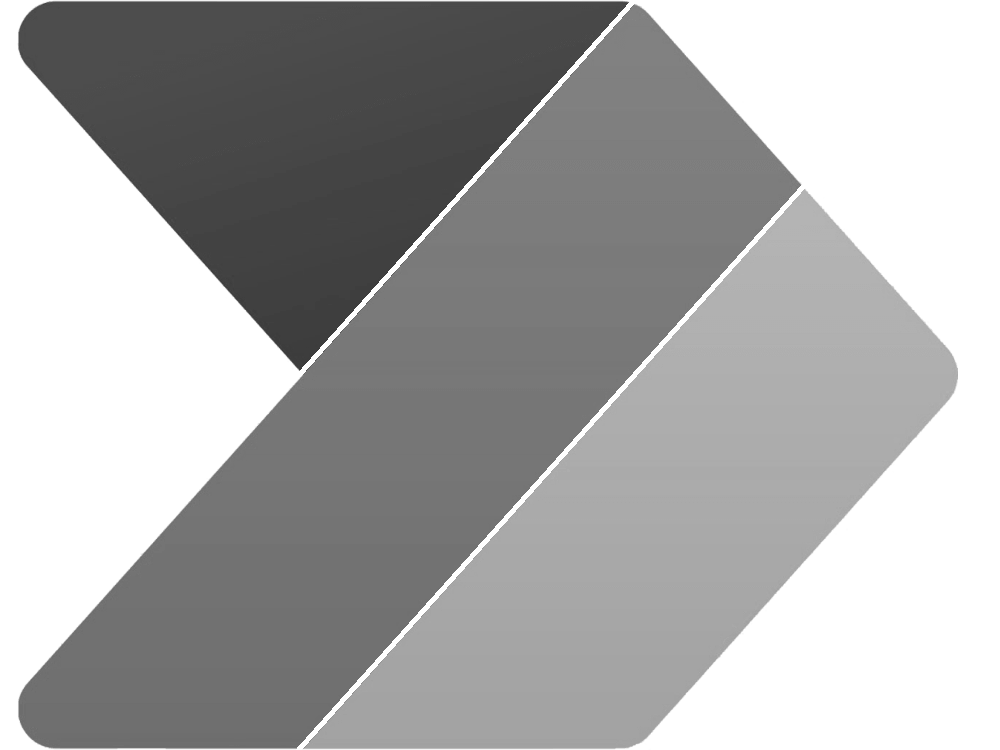

In [4]:
# Crop the image 
new_width = 1000
new_height = 750

#img = Image.open('img.png')
img = img.convert("RGBA")
datas = img.getdata()


width, height = img.size   # Get dimensions

left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
img = img.crop((left, top, right, bottom))

img

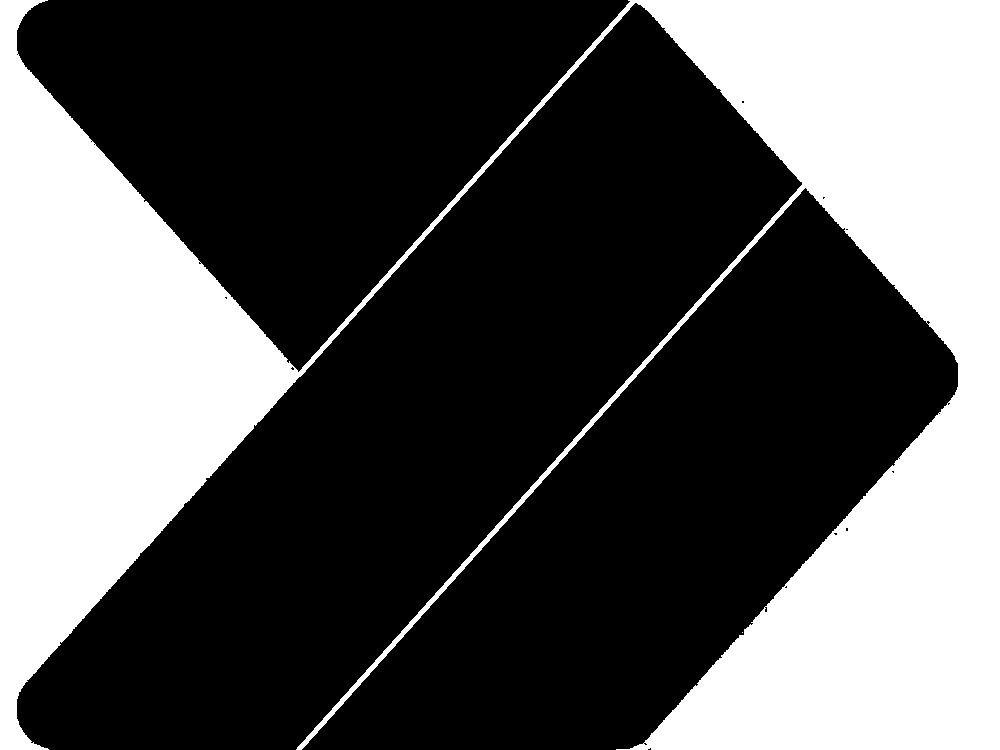

In [5]:
# Convert to black and white binary coloring
img = Image.fromarray(np.uint8(np.array(img)//255)*255)
img

In [6]:
# Change size
basewidth =40

wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('maple_lg2.png')

img

In [7]:
# Invert Colors
img = Image.open('maple_lg2.png').convert('RGBA')
r, g, b, a = img.split()

def invert(image):
    return image.point(lambda p: 255 - p)

r, g, b = map(invert, (r, g, b))
img = Image.merge(img.mode, (r, g, b, a))

img

In [8]:
# Convert any black cells to transparent (if necessary)
datas = img.getdata()

newData = []
for item in datas:
    if item[0] < 100 and item[1] < 100 and item[2] < 100:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)

In [9]:
img.save('img_temp.png')
b = get_base64_encoded_image('img_temp.png')

In [10]:
logo_name = "Power%20Automate"
logo_color = "3486f2"

In [11]:
print(f"https://img.shields.io/badge/{logo_name}-{logo_color}.svg?style=for-the-badge&logo=data:image/png;base64,{b}")

https://img.shields.io/badge/Power%20Automate-3486f2.svg?style=for-the-badge&logo=
